Assignment 1 : 

This code belongs to  SAURAV KUMAR(21D070063). I have done the solution of the questions as the sequence given in the question.
Primarily, I have done most of work myself and when i got stuck i took help from the following internet sources -- Tutorialspoint, 
stackoverflow, GeeksforGeeks, chatGPT, stackexchange, NUmpy etc, link of which i have attached wherever i used. I have discussed some of the debuggings with my friend, Deep Boliya(21D070022). 


Question 1:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import time

def gen(N, S):
    #https://numpy.org/doc/stable/reference/random/index.html                                              
    M, D = S.shape       
    random_array = np.random.randn(N, M)            # Generate a random 2-D array of size NxM with standard normal distribution
    X = np.dot(random_array, S)                     # Multiply the random array with the generator matrix S
    
    return X



Question 2:

In [2]:
def target(X, w, sigma):
    X1 = np.hstack((X, np.ones((X.shape[0], 1))))    #https://www.geeksforgeeks.org/numpy-hstack-in-python/
    product_with_bias = np.dot(X1, w)                # Multiply X with w (excluding one element) and add bias
    noise = np.random.normal(0, np.sqrt(sigma), (X.shape[0],1))      # Add zero-mean Gaussian noise with variance sigma
    
    t = product_with_bias + noise                                # Generate target vector t

    return t

                         

Question 3:

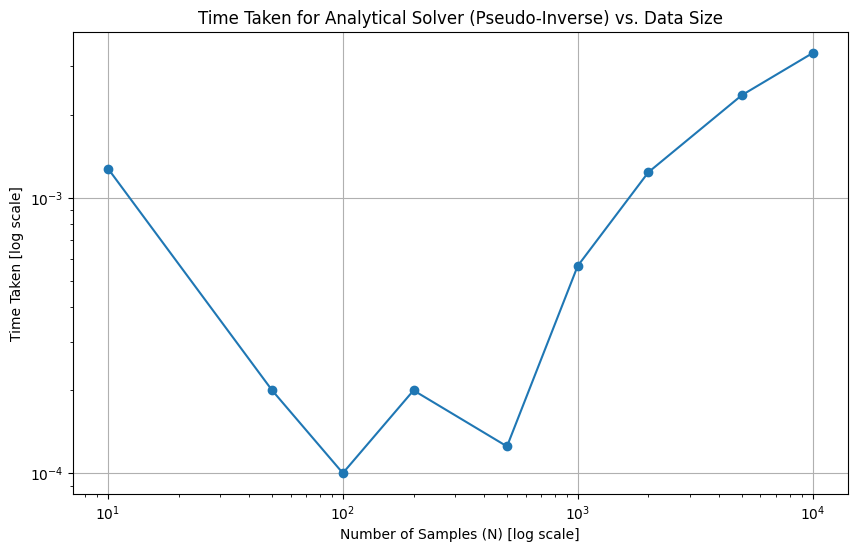

In [3]:


def analytical_solver_pinv(X, t): 
   
    X_pseudo_inv = np.linalg.pinv(X)
    w = np.dot(X_pseudo_inv, t)
    return w 


def generate_data(N, D):
    X = np.random.rand(N, D)                                 # random data 
    
    X = np.concatenate((X, np.ones((N, 1))), axis=1)         # Adding a bias term to the data matrix
    w_true = np.random.rand(D + 1)                           # weight vector random normalised
    t = np.dot(X, w_true) + np.random.normal(0, 0.1, N)      # Adding some noise
    return X, t


D = 10                                                       # Number of features (excluding bias)
N_values = [10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]  # Varying sample sizes
num_iterations = 10                                          # Number of iterations for averaging

times = []                                                   # Arrays to store time values

for N in N_values:                                           #https://chat.openai.com/
    total_time = 0

    for _ in range(num_iterations):
        X, t = generate_data(N, D)
       
        start_time = time.time()                             # Measure the time taken for solving with pseudo-inverse
        analytical_solver_pinv(X, t)
        end_time = time.time()

        total_time += end_time - start_time                  # updating total time

    average_time = total_time / num_iterations
    times.append(average_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, times, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.title('Time Taken for Analytical Solver (Pseudo-Inverse) vs. Data Size')
plt.xlabel('Number of Samples (N) [log scale]')
plt.ylabel('Time Taken [log scale]')
plt.grid(True)
plt.show()




OBSERVATIONS:

If we observ the graph then it seems to be like time taken is increasing with increase in value of N.
it might be the case that complexity of computaion is incresing with the values of N and memory requirement 
also makes it slow and time taking . Size of pseudo inverse computations is increasing and hence
it justify the strange behaviour. More the compexity and computing then more the time it will take.

Question 4:

In [4]:
def calc_nrmse(X, w, t) :
    
    X1 = np.hstack((X, np.ones((X.shape[0], 1))))
    y= np.dot(X1, w)
    rmse = np.sqrt(np.mean((t - y) ** 2)) #root mean square error simple formula
    range = max(t) - min(t)                # calculating range
    nrmse = rmse/range                     # normalised rmse

    return nrmse


Question 5:

In [5]:
import numpy as np

def mse_gradient(X, w, t):
    X1 = np.hstack((X, np.ones((X.shape[0], 1))))
    y= np.dot(X1, w)
    N = X.shape(0)
    gradient = (2/N) * np.dot(X1.T, (y - t))    # using just formula to get the gradient of MSE
    #https://www.bragitoff.com/2021/12/mean-squared-error-loss-function-and-its-gradient-derivative-for-a-batch-of-inputs-python-code/
    return gradient



Question 6:

In [6]:

def l2_norm_gradient(w):
    
    norm = np.linalg.norm(w[:-1])     # L2 norm of weights
    gradient_l2_norm = w / norm       # Gradient of L2 norm with respect to weights
    gradient_l2_norm[-1]=[0]          # setting the bias term as 0 
    
    return gradient_l2_norm





Question 7:

In [7]:
import numpy as np

def l1_norm_gradient(w):
    

    gradient_l1_norm = np.sign(w)        # Gradient of L1 norm with respect to weights as w/|w|
    gradient_l1_norm[w == 0] = 0         # Set gradient to 0 where weights are 0
    gradient_l1_norm[-1] = [0]           # setting the bias term as 0

    return gradient_l1_norm





Question 8:

In [8]:

def gradient_descent(X, t1, learning_rate, lambda1, lambda2, iterations_count, stopping_bound):


    N, D = X.shape                                      # defining shape                                            
    w = np.zeros((D + 1, 1))                            # Initialize weight vector with zeros                                     
    X1 = np.hstack((X, np.ones((N, 1))))                # Add bias term having all 1
   

    for i in range(iterations_count):                   # loop for running the function for certain number of times
        
        y = np.dot(X1, w)                               # Compute predicted values                                    
        X2 = np.transpose(X1)                           # transposing the X1 data to multiply
        gradient_mse = (2/N) * np.dot(X2, (y - t1))     # computing MSE using general formula
        
        gradient_l1 = lambda1 * l1_norm_gradient(w)                                   # multipying  l1 norm  and lambda1
        gradient_l2 =  2 *lambda2 * l1_norm_gradient(w)                               # l2 norm and lambda2 and factor 2 due to differentiation term
  
        gradient = gradient_mse + gradient_l1 + gradient_l2                           # Combine gradients
        
        w -= learning_rate * gradient                                                 # Update weights using gradient descent
  
        if np.linalg.norm(gradient) < stopping_bound:                                 # Stopping criterion
            print("Converged after", i+1, "iterations.")                 #https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
            break

    return w



Question 9:

Converged after 883 iterations.
Converged after 884 iterations.
Converged after 883 iterations.
Converged after 883 iterations.
Converged after 883 iterations.
Converged after 883 iterations.
Converged after 883 iterations.
Converged after 886 iterations.
Converged after 885 iterations.
Converged after 886 iterations.
Converged after 885 iterations.
Converged after 884 iterations.
Converged after 881 iterations.
Converged after 885 iterations.
Converged after 883 iterations.
Converged after 885 iterations.
Converged after 884 iterations.
Converged after 882 iterations.
Converged after 885 iterations.
Converged after 882 iterations.
Converged after 886 iterations.
Converged after 881 iterations.
Converged after 882 iterations.
Converged after 882 iterations.
Converged after 883 iterations.


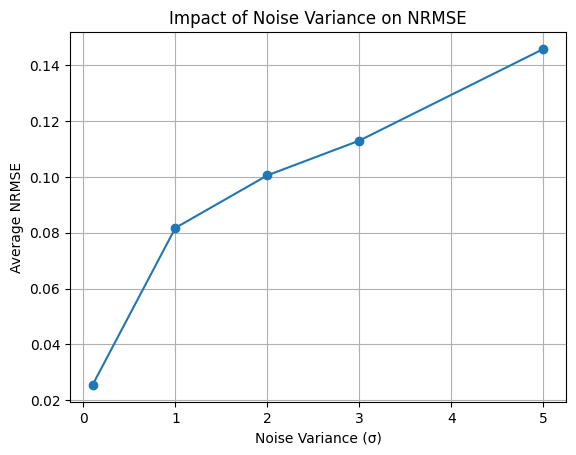

In [9]:


# defining parameters for plotting graph and calculation 
N = 1000                                                            # Number of samples
D = 10                                                              # Number of features
S = np.identity(D)                                                  # identity matrix
learning_rate = 0.01                                                # defining learning rate 
max_iterations = 1000                                               # defining number of iterations
stopping_bound = 1e-6                                               # stop bound
lambda1 = 0                                                         # l1 regularization parameter
lambda2 = 0                                                         # l2 regularization parameter
sigmas = [0.1, 1, 2,3,  5]                                          # Noise variances
X= gen(N, S)                                                        # generating X
w1 = np.random.randn(D+1, 1)                                        # generating random weight vector


def split(X, t) :                                                    # writing a function for splitting the data in train and test sets
    split_index = int(N * 0.8)                                       # 80% for training, 20% for validation
    X_train, X_val = X[:split_index], X[split_index:]                # split x in train and validaiton subsets
    t_train, t_val = t[:split_index], t[split_index:]                # split target in train and validaiton subsets
    return X_train, t_train, X_val, t_val       

#https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
def evaluate_model(X_val, t_val, w):
    
    X1 = np.hstack((X_val, np.ones((X_val.shape[0], 1)))) 
    y_pred = np.dot(X1, w)
    mse_val = np.mean((t_val - y_pred)**2)
    nrmse = np.sqrt(mse_val) / (np.max(t_val) - np.min(t_val))
    return nrmse

         
average_nrmse = []                                                    # empty array for storing average nrmse

for sigma in sigmas:                                                  # Run experiments for each value of sigma
    nrmse_list = []

    for _ in range(5):                                                # Run 5 experiments
        # Here, I was stuck due to error in dimension , DEEP BOliya(21d070022) helped me figure out  the dimensions that were mismatched.
        t = target(X, w1, sigma)                                      # generating target vector using w1 defind earlier
        X_train, t_train, X_val, t_val = split(X, t)                  # splitting the data
        
        w = gradient_descent(X_train, t_train, learning_rate,lambda1, lambda2, max_iterations, stopping_bound)  # Train using gradient descent
        nrmse = evaluate_model(X_val, t_val, w)                       # Evaluating  model on validation data and getting NRmse
        nrmse_list.append(nrmse)                                      # getting elements for the list

    average_nrmse.append(np.mean(nrmse_list))                          # Calculate average NRMSE for this sigma

# Here we are plotting the results
plt.plot(sigmas, average_nrmse, marker='o')
plt.xlabel('Noise Variance (σ)')
plt.ylabel('Average NRMSE')
plt.title('Impact of Noise Variance on NRMSE')
plt.grid(True)
plt.show()


Observation: 

The NRMSE increases for the increase in the  increase in the error varience as expected. Larger varience will cause error throughout the
target vector leading to more error in the NRMSE. 

Question 10.

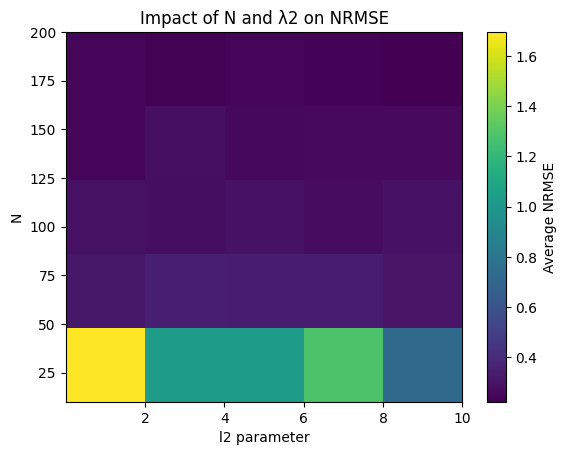

In [10]:

 

# defining parameters for plotting graph and calculation 
sigma = 0.5                                                   # Noise variance 
D = 10                                                        # defining D
S = np.identity(D, dtype = float)                             # identity matrix as given in the question
learning_rate = 0.01                                          # Learning rate for gradient descent
max_iterations = 1000                                         # Maximum number of iterations
stopping_bound = 1e-6                                         # stopping criterion prarameter
N_values = [10, 50, 80, 100, 200]                           # Number of samples (N) values
lambda2_values = [0.001, 0.01, 0.1, 1, 10]                    # L2 regularization parameter (λ2) values
w1 = np.random.randn(D+1, 1)                                  # random weights for generating target


results = np.zeros((len(N_values), len(lambda2_values)))      # Initialize results matrix

# Running experiments for each combination of N and λ2

for i, N in enumerate(N_values):                              # loop for varying values of N
    result_N = []

    for j, lambda2 in enumerate(lambda2_values):              # loop for varying values of lambda2
        nrmse_list = []

        
        for _ in range(5):                                    # Running 5 experiments
            
            X = gen(N, S)                                     # generating X 
            t = target(X, w1, sigma)                          # generating target vector using the w1 weight
            X_train, t_train, X_val, t_val = split(X, t)      # splitting the data into train and test sets
            w = gradient_descent(X_train, t_train, learning_rate, 10, lambda2, max_iterations, stopping_bound)     # Training using gradient descent as defined earlier
            nrmse = evaluate_model(X_val, t_val, w)          # Evaluate model on validation data
            nrmse_list.append(nrmse)                         # storing in the nrmse list
            
        
        results[i, j] = np.mean(nrmse_list)                 # Calculate average NRMSE for this combination of N and λ2
       
       
nrmse_list = np.array(nrmse_list)
# Plotting the results in heat plot as we have two degrees of freesom and one result.

plt.imshow(results, cmap='viridis', origin='lower', extent=[min(lambda2_values), max(lambda2_values), min(N_values), max(N_values)], aspect='auto')
plt.colorbar(label='Average NRMSE')
plt.xlabel('l2 parameter')
plt.ylabel('N')
plt.title('Impact of N and λ2 on NRMSE')
plt.show()



Observation : 

It is obvious to see that for high values of N , average NRMSE goes towards 0 . ANd for l2 regularization parameter it is increasing then decreasing for low values of N. Higher Values of N, leads to override the effect and hence goes towards 0.

Question 11:

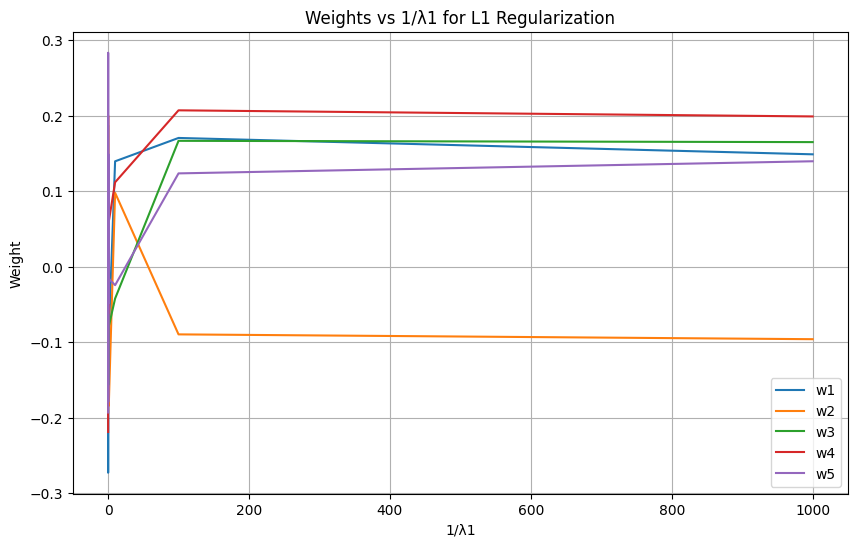

In [11]:
def generate_data(N, D, sigma, rho=0):

    # https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
    # Generate random data matrix X with optional correlation
    if rho != 0:
        cov_matrix = np.eye(D) * (1 - rho) + rho
        X = np.random.multivariate_normal(np.zeros(D), cov_matrix, N)
    else:
        X = np.random.randn(N, D)

    # Add noise
    X += np.random.normal(0, sigma, size=(N, D))

    return X
# Parameters for testing and plotting the graph
N = 1000                                              # Number of samples
D = 5                                               # Number of features
S = np.identity(D)
learning_rate = 0.01                                          # Learning rate for gradient descent
max_iterations = 1000                                         # Maximum number of iterations
stopping_bound = 1e-6                                         # stopping criterion prarameter
sigma = 0.5                                           # Noise variance
rho = 0.5                                             # Correlation coefficient
lambda1_values = [0.001, 0.01, 0.1, 1,2, 3, 4, 6, 8, 10]            # L1 regularization parameter values
w1 = np.random.randn(D+1, 1)
X = generate_data(N, D, sigma, rho)
t = target(X, w1, sigma)

weights = []
for lambda1 in lambda1_values :
     w = gradient_descent(X, t, learning_rate, lambda1, 10, max_iterations, stopping_bound)
     weights.append(w)

    
 # Plot weights versus 1/lambda1
weights = np.array(weights)
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):
    plt.plot(1 / np.array(lambda1_values), weights[:, i], label=f'w{i+1}')
plt.xlabel('1/λ1')
plt.ylabel('Weight')
plt.title('Weights vs 1/λ1 for L1 Regularization')
plt.legend()
plt.grid(True)
plt.show()

Observation :

At high value of lambda 1 , weights are strage but at low value it is settling down quickly.



Question 12:

Converged after 965 iterations.
Converged after 963 iterations.
Converged after 938 iterations.
Converged after 963 iterations.
Converged after 960 iterations.
Converged after 935 iterations.


C:\Users\Admin\AppData\Local\Temp\ipykernel_10784\1883171626.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0[i][j]=w[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_10784\1883171626.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w1[i][j]=w[1]
C:\Users\Admin\AppData\Local\Temp\ipykernel_10784\1883171626.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w2[i][j]=w[2]
C:\Users\Admin\AppData\Local\Temp\ipykernel_10784\1883171626.py:33: DeprecationWarnin

Converged after 938 iterations.
Converged after 935 iterations.
Converged after 894 iterations.


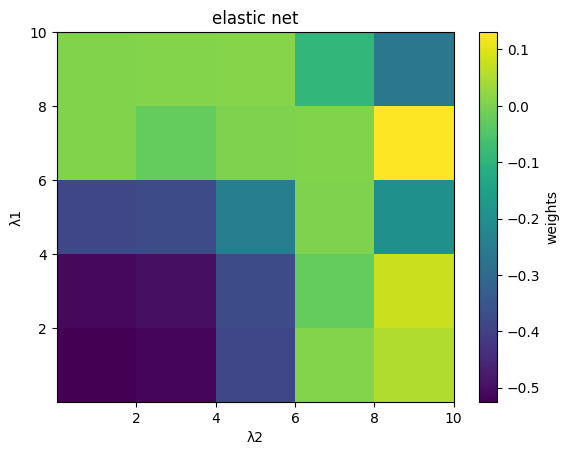

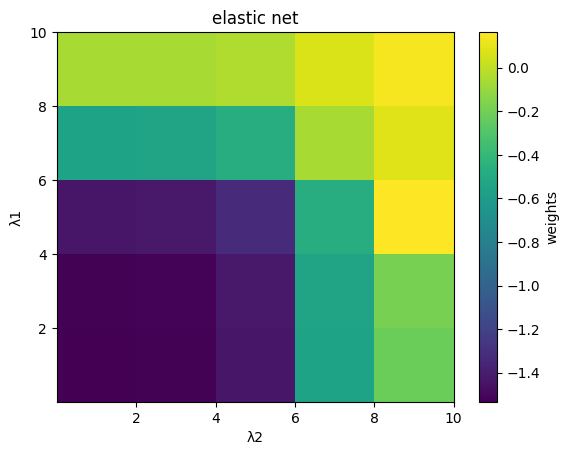

In [12]:

 

# defining parameters for plotting graph and calculation 
N = 1000 
rho = 0.5
sigma = 0.5                                                   # Noise variance 
D = 4                                                       # defining D
S = np.identity(D, dtype = float)                             # identity matrix as given in the question
learning_rate = 0.01                                          # Learning rate for gradient descent
max_iterations = 1000                                         # Maximum number of iterations
stopping_bound = 1e-6                                         # stopping criterion prarameter
lambda1_values = [0.001, 0.02, 0.2, 2, 10]                    # L2 regularization parameter (λ2) values
lambda2_values = [0.001, 0.01, 0.1, 1, 10]                    # L2 regularization parameter (λ2) values
w1 = np.random.randn(D+1, 1)                                  # random weights for generating target
X = generate_data(N, D, sigma, rho)                                     # generating X 
t = target(X, w1, sigma)                          # generating target vector using the w1 weight
X_train, t_train, X_val, t_val = split(X, t)      # splitting the data into train and test sets


w0 = np.zeros((len(lambda1_values), len(lambda2_values)))      # Initialize weight matrix
w1 = np.zeros((len(lambda1_values), len(lambda2_values))) 
w2 = np.zeros((len(lambda1_values), len(lambda2_values))) 
w3 = np.zeros((len(lambda1_values), len(lambda2_values))) 
w4 = np.zeros((len(lambda1_values), len(lambda2_values))) 

# Running experiments for each combination of N and λ2

for i, lambda1 in enumerate(lambda1_values):                              # loop for varying values of lambda1
    for j, lambda2 in enumerate(lambda2_values):                          # loop for varying values of lambda2
           
     w = gradient_descent(X_train, t_train, learning_rate, lambda1, lambda2, max_iterations, stopping_bound)     # Training using gradient descent as defined earlier
     w0[i][j]=w[0]
     w1[i][j]=w[1]
     w2[i][j]=w[2]
     w3[i][j]=w[3]
     w4[i][j]=w[4]

       
        
        
      
       
       

# Plotting the results in heat plot as we have two degrees of freesom and one result.
# plotting for w0 , similarly we can plot for other weights .
     

plt.imshow(w0, cmap='viridis', origin='lower', extent=[min(lambda2_values), max(lambda2_values), min(lambda1_values), max(lambda1_values)], aspect='auto')
plt.colorbar(label='weights')
plt.xlabel('λ2')
plt.ylabel('λ1')
plt.title('elastic net')
plt.show()


plt.imshow(w1, cmap='viridis', origin='lower', extent=[min(lambda2_values), max(lambda2_values), min(lambda1_values), max(lambda1_values)], aspect='auto')
plt.colorbar(label='weights')
plt.xlabel('λ2')
plt.ylabel('λ1')
plt.title('elastic net')
plt.show()


observation:



Question 13:

In [13]:


def generate_binary_classification_vector(X, w, sigma):
    
    t = target(X, w, sigma)                                           # adding noise
    binary_target = np.sign(t)                    # Convert to binary classification (-1 or 1), 
    #https://www.geeksforgeeks.org/getting-started-with-classification/

    return binary_target




Question 14:

In [14]:
#https://math.stackexchange.com/questions/2503428/derivative-of-binary-cross-entropy-why-are-my-signs-not-right
def sigmoid(X, w):
    X1 = np.hstack((X, np.ones((X.shape[0], 1))))  #https://www.geeksforgeeks.org/numpy-hstack-in-python/
    h = np.dot(X1, w)
    z = 1 / (1 + np.exp(-h))
    return z

def binary_cross_entropy(X, w, t):
    
    y_true = t
    z = sigmoid(X, w)
    
    return -(y_true * np.log(z) + (1 - y_true) * np.log(1 - z))

def binary_cross_entropy_gradient(X, w, t):
    z = sigmoid( X, w)
    X1 = np.hstack((X, np.ones((X.shape[0],1))))
    output = np.dot(X1.T, (z-t))
    return output

Question 15:


C:\Users\Admin\AppData\Local\Temp\ipykernel_10784\3600899275.py:5: RuntimeWarning: overflow encountered in exp
  z = 1 / (1 + np.exp(-h))


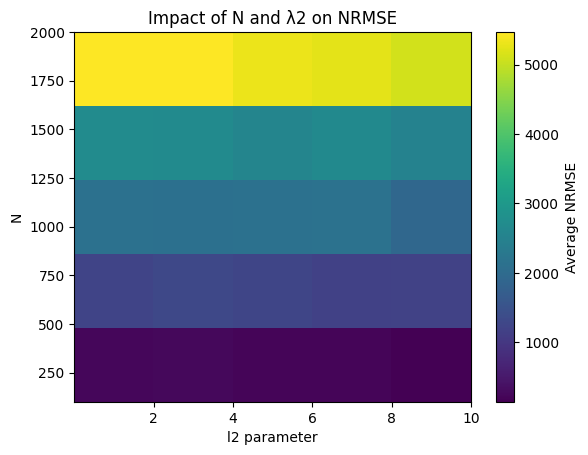

In [15]:

 
#https://math.stackexchange.com/questions/2503428/derivative-of-binary-cross-entropy-why-are-my-signs-not-right

def elastic_net_gradient_descent(X, t, learning_rate, lambda1, lambda2, iterations_count, stopping_bound):
    
    N, D = X.shape                                      # defining shape                                            
    w = np.zeros((D + 1, 1))                            # Initialize weight vector with zeros                                     
    
   

    for i in range(iterations_count):                   # loop for running the function for certain number of times
          
        gradient_mse = binary_cross_entropy_gradient(X, w, t)# computing MSE using general formula
        gradient_l1 = lambda1 * l1_norm_gradient(w)                                   # multipying  l1 norm  and lambda1
        gradient_l2 =  2 *lambda2 * l1_norm_gradient(w)                               # l2 norm and lambda2 and factor 2 due to differentiation term
  
        gradient = gradient_mse + gradient_l1 + gradient_l2                           # Combine gradients
        
        w -= learning_rate * gradient                                                 # Update weights using gradient descent
  
        if np.linalg.norm(gradient) < stopping_bound:                                 # Stopping criterion
            print("Converged after", i+1, "iterations.")                 #https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/
            break

    return w


 

# defining parameters for plotting graph and calculation 
sigma = 0.5                                                   # Noise variance 
D = 10                                                        # defining D
S = np.identity(D, dtype = float)                             # identity matrix as given in the question
learning_rate = 0.01                                          # Learning rate for gradient descent
max_iterations = 1000                                         # Maximum number of iterations
stopping_bound = 1e-6                                         # stopping criterion prarameter
N_values = [100, 500, 800, 1000, 2000]                           # Number of samples (N) values
lambda2_values = [0.001, 0.01, 0.1, 1, 10]                    # L2 regularization parameter (λ2) values
w1 = np.random.randn(D+1, 1)                                  # random weights for generating target

# z = sigmoid()
results = np.zeros((len(N_values), len(lambda2_values)))      # Initialize results matrix

# Running experiments for each combination of N and λ2

for i, N in enumerate(N_values):                              # loop for varying values of N
    result_N = []

    for j, lambda2 in enumerate(lambda2_values):              # loop for varying values of lambda2
        nrmse_list = []

        
        for _ in range(5):                                    # Running 5 experiments
            
            X = gen(N, S)                                     # generating X 
            t = generate_binary_classification_vector(X, w1, sigma)                        # generating target vector using the w1 weight
            
            X_train, t_train, X_val, t_val = split(X, t)      # splitting the data into train and test sets
            w = elastic_net_gradient_descent(X_train, t_train, learning_rate, 10, lambda2, max_iterations, stopping_bound)     # Training using gradient descent as defined earlier
            nrmse = evaluate_model(X_val, t_val, w)          # Evaluate model on validation data
            nrmse_list.append(nrmse)                         # storing in the nrmse list
            
        
        results[i, j] = np.mean(nrmse_list)                 # Calculate average NRMSE for this combination of N and λ2
       
       
nrmse_list = np.array(nrmse_list)
# Plotting the results in heat plot as we have two degrees of freesom and one result.

plt.imshow(results, cmap='viridis', origin='lower', extent=[min(lambda2_values), max(lambda2_values), min(N_values), max(N_values)], aspect='auto')
plt.colorbar(label='Average NRMSE')
plt.xlabel('l2 parameter')
plt.ylabel('N')
plt.title('Impact of N and λ2 on NRMSE')
plt.show()



